## Thresholding <br>
<br>
Lighting conditions are absolutely critical due to lighting conditions are less than adequate , the identification will fail. <br>
Three types of thresholding methods.<br>
Thresholdng is process of converting a grayscale image into binary image, where the pixles are either 0 or 255.<br>


In [1]:
import numpy as np
import imutils
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Simple Thresholding

file ="/mnt/c/cnn_dl/morph_pyimagesearch_logo.png"
image = cv2.imread(file)

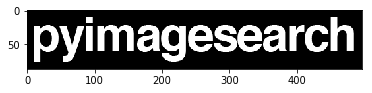

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )
blurred = cv2.GaussianBlur( gray, (7,7), 0 )
plt.imshow( image )

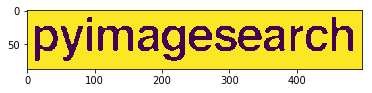

In [7]:
# basic thresholding -- if a pixel is greater than threshold value 200 then set to 255 ( black)

(T,threshInv) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshInv)

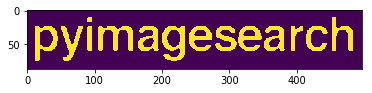

In [8]:
#using normal thresholding
(T,thresh) = cv2.threshold(blurred, 200,255, cv2.THRESH_BINARY )
plt.imshow(thresh)

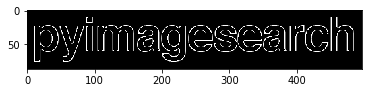

In [9]:
# visualize only the masked regions in the image;

plt.imshow( cv2.bitwise_and(image,image, mask=threshInv))

Ostu method is global thresholding; **T** value can be applied to entire image also. <br>
for examples, license plate characters and letters from the license plate.

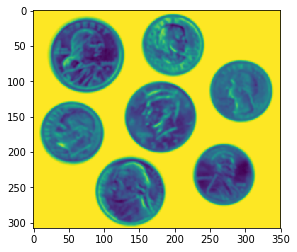

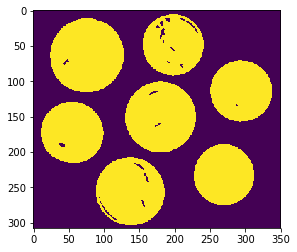

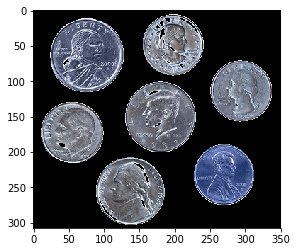

In [14]:


def simple_thresholding(image):
    image = cv2.imread(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)
    plt.figure()
    plt.imshow(blurred)
    
    (T, threshInv) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)
    plt.figure()
    plt.imshow(threshInv)
    
    (T, thresh) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
    plt.figure()
    plt.imshow(thresh)
    
    plt.imshow( cv2.bitwise_and(image, image, mask=threshInv) )
    

file="/mnt/c/cnn_dl/data/coins01.png"
simple_thresholding(file)

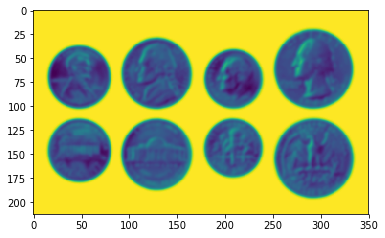

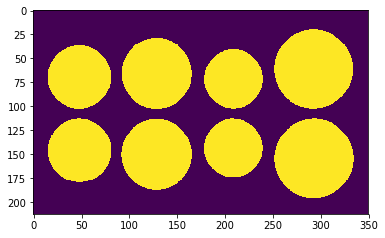

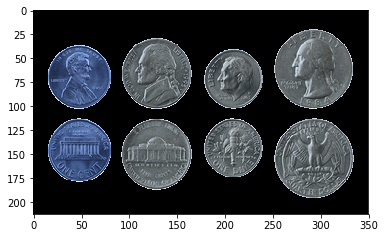

In [17]:
file="/mnt/c/cnn_dl/data/coins02.png"
simple_thresholding(file) #observation: small gaps inside the thresholded coin mask can be filled using 
#morphological operations or contour methods



Difference between coin1 and coin2: Why holes in the coin1? Due to **Lighting conditions**;<br>
Solution: Otsu's Method and adaptive thresholding.

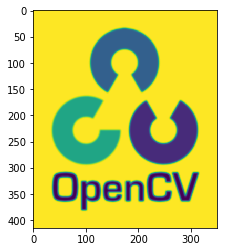

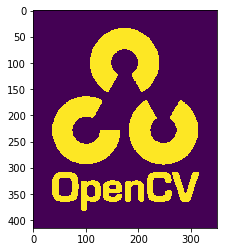

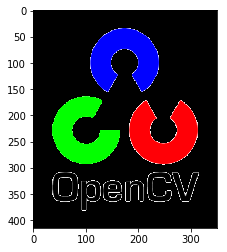

In [18]:
file="/mnt/c/cnn_dl/data/opencv_logo.png"
simple_thresholding(file)

Ostu's methods: automatically computer the optimal value of **T**. <br>
Otsu's method assumes an image contains two classes of pixles: the background and the foreground.
It uses Histogram ( two peaks )<br>
T value is computed for the entire image.<br>


In [19]:
#otsu_thresholding

def otsu_thresholding(file):
    image = cv2.imread(file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )
    blurred = cv2.GaussianBlur(gray, (7,7), 0 )
    plt.figure()
    plt.imshow(blurred)
    
    #apply ostu automatic thresholding -- 
    (T, threshInv) = cv2.threshold( blurred, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU )
    plt.figure()
    plt.imshow(threshInv)
    
    plt.figure()
    plt.imshow( cv2.bitwise_and(image, image, mask=threshInv))
    
    


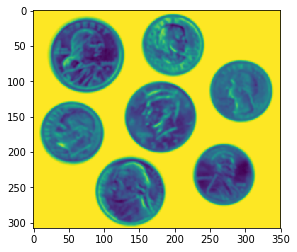

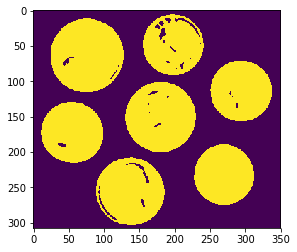

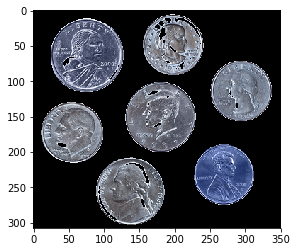

In [21]:
file="/mnt/c/cnn_dl/data/coins01.png"
otsu_thresholding(file)

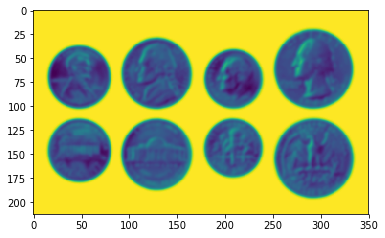

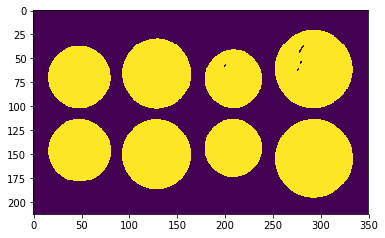

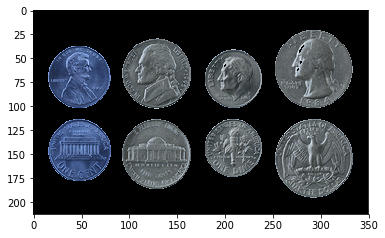

In [22]:
file="/mnt/c/cnn_dl/data/coins02.png"
otsu_thresholding(file)

Adaptive Thresholding: manually supply threshold value T.<br>
Need to manually tuning the T value and practically not possible.

In [24]:
#adaptive thresholding:

from skimage.filters import threshold_local


In [27]:
def adaptive_thresholding(file):
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )
    blurred = cv2.GaussianBlur( image, (5,5), 0 )
    plt.figure()
    plt.imshow(blurred)
    
    #instead of specifying the threshold value use mean value of the neighborhood area of pixels and constant substract from mean calulation
    # i.e, the avlue 15
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 25, 15 )
    plt.figure()
    plt.imshow(thresh)
    
    T = threshold_local( blurred, 29, offset=5, method='gaussian')
    thresh = ( blurred < T ).astype("uint8") * 255
    print(thresh)
    plt.figure()
    plt.imshow(thresh)
    

[[  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 ..., 
 [  0   0   0 ..., 255 255 255]
 [  0   0   0 ..., 255 255 255]
 [  0   0   0 ..., 255 255 255]]


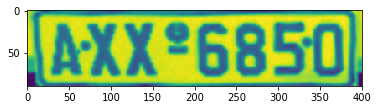

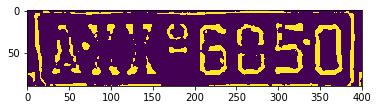

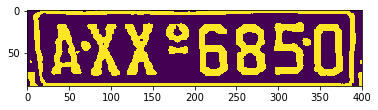

In [28]:
file="/mnt/c/cnn_dl/data/license_plate.png"
adaptive_thresholding( file )